## Decoding Social Media Volatility

Analysis a complete dataset, including outliers, to capture authentic user behavior.

Utilizing advanced statistical techniques to uncover hidden relationships between engagement metrics and viewership.


-->I'll be working with full not a trimmed(IQR &TTM) version in order to maintian randomness & level of details



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import networkx as nx


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/MyDrive/DataRead/Social Media.xlsx')

In [6]:
df['Create_date'] = pd.to_datetime(df['Create_date'], format='%Y-%m-%d')
df.Create_date=pd.to_datetime(df.Create_date)

Columns_to_drop  ='Time_stamp'

df = df.drop(Columns_to_drop,axis=1)


df[['Days_of_week','Months','Popularity','parts_of_day','Week_Status']] =df[['Days_of_week','Months','Popularity','parts_of_day','Week_Status']].astype('category')

In [7]:
df.dtypes

comment_count                 int64
like_count                    int64
share_count                   int64
height                        int64
width                         int64
create_time                   int64
Create_date          datetime64[ns]
Year                          int64
Days_of_week               category
Months                     category
duration(seconds)             int64
title                        object
view_count                    int64
Popularity                 category
parts_of_day               category
Week_Status                category
dtype: object

# Exploratory Data Analysis

## Data description and outliers check


**Skewness**:

Skewness measures the asymmetry of a probability distribution.
A skewness value of 0 indicates a perfectly symmetrical distribution.
If skewness is negative, the distribution is skewed to the left (left-tailed) with the tail on the left side longer or fatter than the right.
If skewness is positive, the distribution is skewed to the right (right-tailed) with the tail on the right side longer or fatter than the left.
Skewness helps identify whether the data is concentrated more on one side than the other.
Kurtosis:

**Kurtosis**

 measures the "tailedness" or the sharpness of the peak of a probability distribution.
A kurtosis value of 3 in a normal distribution indicates mesokurtic (normal) behavior.
If kurtosis is less than 3, the distribution is called platykurtic, and the tails are shorter and thinner than the normal distribution.
If kurtosis is greater than 3, the distribution is called leptokurtic, and the tails are longer and fatter than the normal distribution.
Kurtosis helps identify the presence of outliers and the overall shape of the distribution.

Skewness: 12.314144983049868
Kurtosis: 185.61854379456884
count    1025.000000
mean       40.813659
std       195.230106
min         0.000000
25%         2.000000
50%         6.000000
75%        16.000000
max      3637.000000
Name: comment_count, dtype: float64


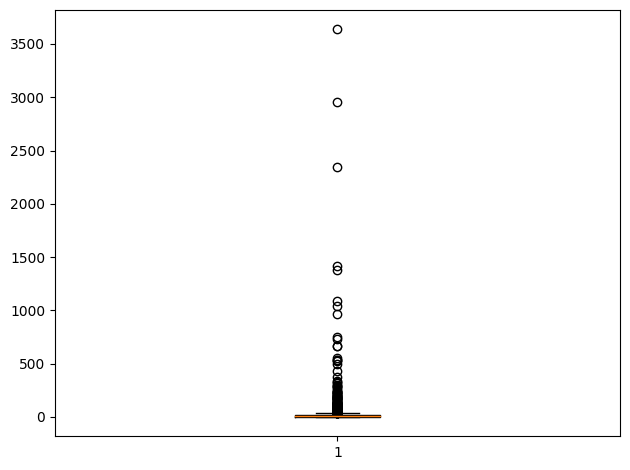

Skewness: 16.83007679771915
Kurtosis: 359.2747306618659
count      1025.000000
mean       4434.157073
std       29630.684889
min           4.000000
25%         125.000000
50%         283.000000
75%         835.000000
max      719523.000000
Name: like_count, dtype: float64


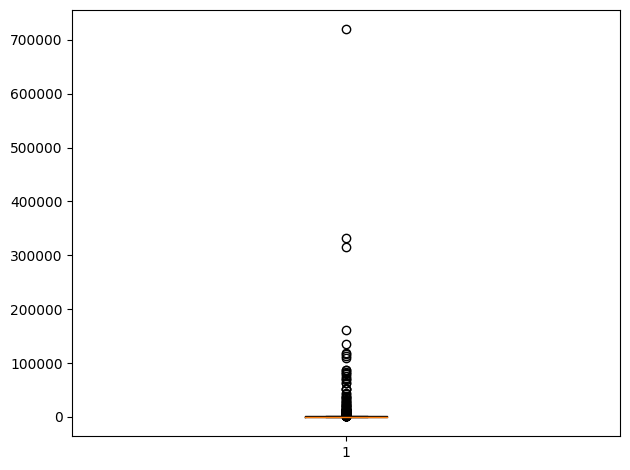

Skewness: 11.34757066103142
Kurtosis: 145.92767832354556
count     1025.000000
mean       437.943415
std       3300.834083
min          0.000000
25%          2.000000
50%          8.000000
75%         34.000000
max      53792.000000
Name: share_count, dtype: float64


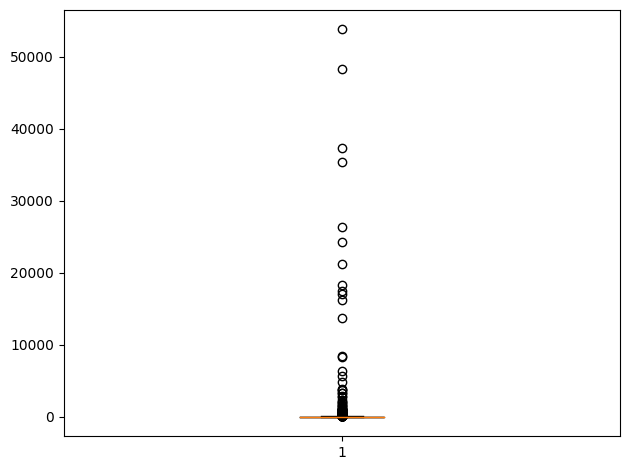

Skewness: 0.5769456031800433
Kurtosis: -1.1861076224052078
count    1025.000000
mean     1479.543415
std       309.982778
min       640.000000
25%      1280.000000
50%      1280.000000
75%      1920.000000
max      1920.000000
Name: height, dtype: float64


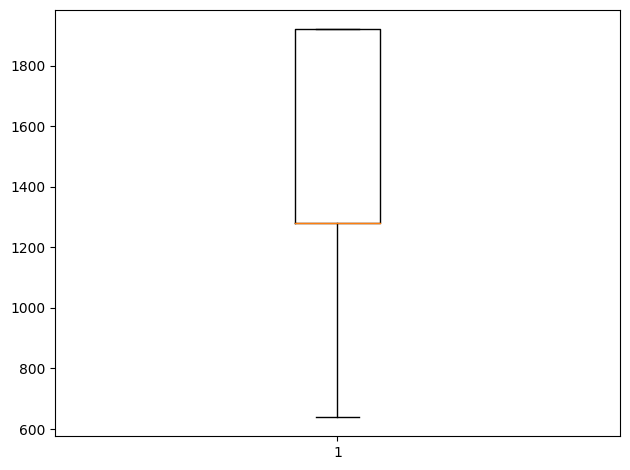

Skewness: 0.6441152565206515
Kurtosis: -1.2523964618541112
count    1025.000000
mean      832.277073
std       171.864276
min       360.000000
25%       720.000000
50%       720.000000
75%      1080.000000
max      1080.000000
Name: width, dtype: float64


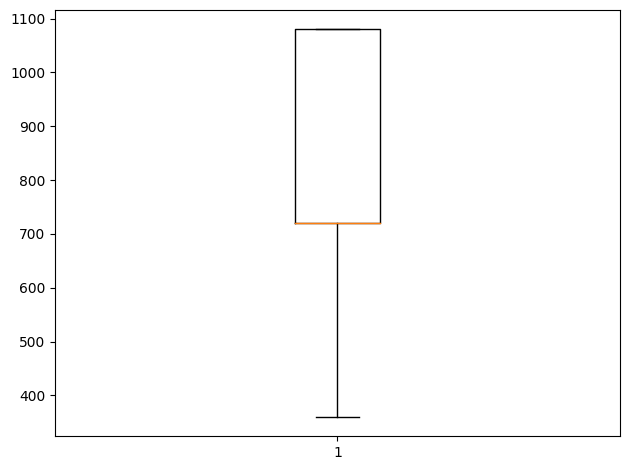

Skewness: -0.4451827526698575
Kurtosis: -1.043217095059225
count    1.025000e+03
mean     1.651971e+09
std      3.590754e+07
min      1.565962e+09
25%      1.622059e+09
50%      1.662148e+09
75%      1.683399e+09
max      1.702067e+09
Name: create_time, dtype: float64


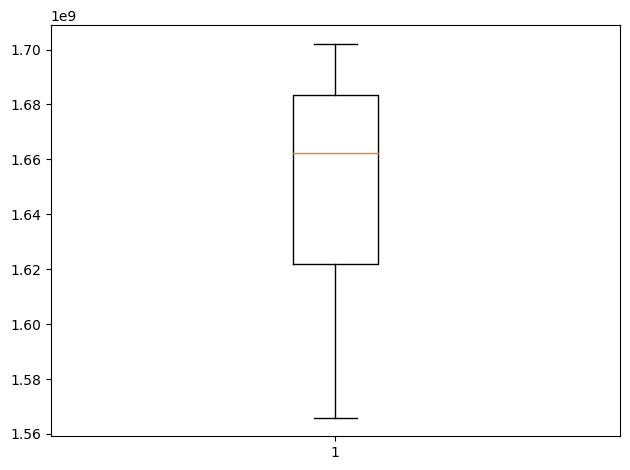

Skewness: -0.5111613760736061
Kurtosis: -0.9513977775372813
count    1025.000000
mean     2021.837073
std         1.150658
min      2019.000000
25%      2021.000000
50%      2022.000000
75%      2023.000000
max      2023.000000
Name: Year, dtype: float64


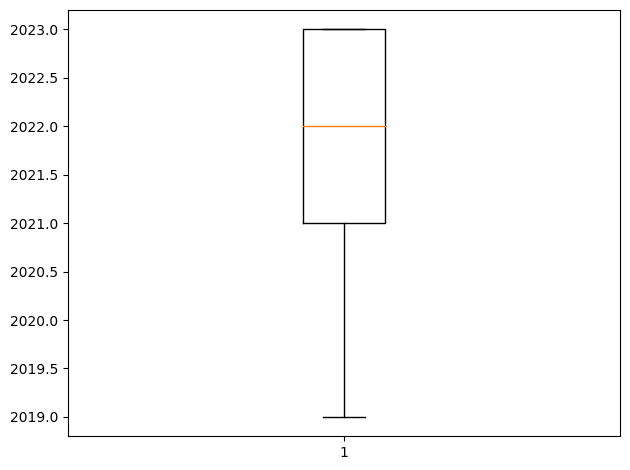

Skewness: 2.74831377949778
Kurtosis: 8.012106395752165
count    1025.000000
mean       26.845854
std        37.005353
min         3.000000
25%         7.000000
50%        11.000000
75%        26.000000
max       253.000000
Name: duration(seconds), dtype: float64


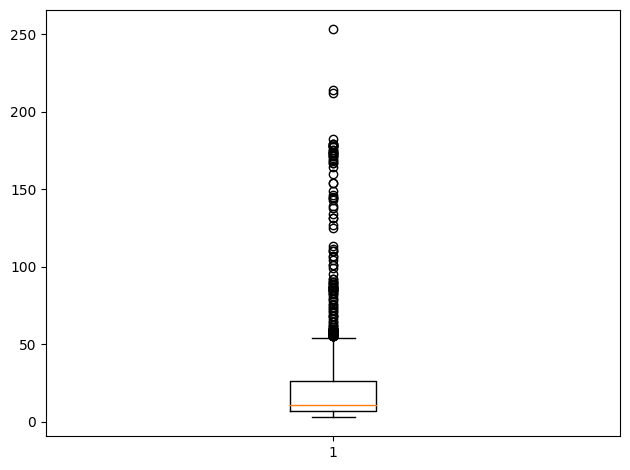

Skewness: 13.452475310670485
Kurtosis: 226.72699280392024
count    1.025000e+03
mean     1.184058e+05
std      6.569790e+05
min      7.150000e+02
25%      4.890000e+03
50%      9.337000e+03
75%      2.129900e+04
max      1.290863e+07
Name: view_count, dtype: float64


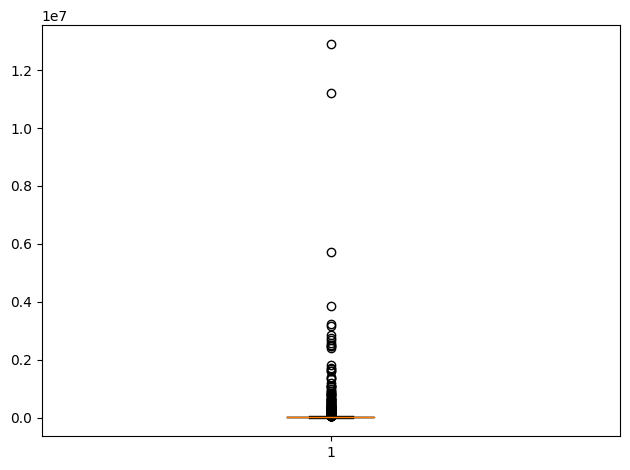

In [8]:
for i in df.select_dtypes(include='number').columns:
    print("Skewness:" ,df[i].skew())
    print("Kurtosis:" ,df[i].kurtosis())
    print(df[i].describe())
    plt.boxplot(df[i])
    plt.tight_layout()
    plt.show()

## Inter-Quartile Range(IQR)


The interquartile range (IQR) is a statistical measure that captures the spread or dispersion of a dataset, particularly focusing on the middle 50% of the values. To calculate the IQR, one subtracts the first quartile (25th percentile) from the third quartile (75th percentile). Essentially, the IQR disregards the influence of extreme values or outliers on a dataset, providing a robust indication of variability in the central portion of the data. It is a valuable metric in descriptive statistics, offering a clearer understanding of the range where the majority of observations lie, thus helping to identify and interpret the dispersion of data with greater resilience to outliers than the standard range or deviation.

In [9]:


def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

def trim_outliers_in_dataframe(data):
    trimmed_df = data.copy()

    for column in trimmed_df.columns:
        if not pd.api.types.is_numeric_dtype(trimmed_df[column].dtype):
            continue

        outliers = find_outliers_iqr(trimmed_df[column])

        # Exclude outliers by assigning NaN to them
        trimmed_df[column] = np.where(outliers, np.nan, trimmed_df[column])

    # Drop rows containing NaN values
    trimmed_df = trimmed_df.dropna()

    return trimmed_df

trimmed_df = trim_outliers_in_dataframe(df)


## Trailing 12 Months(TTM)

In [10]:
from datetime import datetime, timedelta


trimmed_df['Create_date'] = pd.to_datetime(trimmed_df['Create_date'])

max_date = trimmed_df['Create_date'].max()
start_date = max_date - pd.DateOffset(months=12)
ttm = trimmed_df[(trimmed_df['Create_date'] >= start_date) & (trimmed_df['Create_date'] <= max_date)]
print("Start Date:", start_date)
print("End Date:", max_date)

Start Date: 2022-12-08 20:18:30
End Date: 2023-12-08 20:18:30


Trailing 12 months without without including IQR

In [11]:
from datetime import datetime, timedelta


df['Create_date'] = pd.to_datetime(df['Create_date'])

max_date = df['Create_date'].max()
start_date = max_date - pd.DateOffset(months=12)
ttm_2 = df[(df['Create_date'] >= start_date) & (df['Create_date'] <= max_date)]
print("Start Date:", start_date)
print("End Date:", max_date)

Start Date: 2022-12-08 20:18:30
End Date: 2023-12-08 20:18:30


## Summary Statistics



1.   df : Original Data frame without any trimming
2.  Trimmed_df : A Data frame after excluding extreme Values
3. TTM: A dataframe derived after considering IQR+TTM
4. TTM_2: Only Considering TTM




In [12]:
for data in [df, trimmed_df, ttm, ttm_2]:
    print(data.describe())

       comment_count     like_count   share_count       height        width  \
count    1025.000000    1025.000000   1025.000000  1025.000000  1025.000000   
mean       40.813659    4434.157073    437.943415  1479.543415   832.277073   
std       195.230106   29630.684889   3300.834083   309.982778   171.864276   
min         0.000000       4.000000      0.000000   640.000000   360.000000   
25%         2.000000     125.000000      2.000000  1280.000000   720.000000   
50%         6.000000     283.000000      8.000000  1280.000000   720.000000   
75%        16.000000     835.000000     34.000000  1920.000000  1080.000000   
max      3637.000000  719523.000000  53792.000000  1920.000000  1080.000000   

        create_time         Year  duration(seconds)    view_count  
count  1.025000e+03  1025.000000        1025.000000  1.025000e+03  
mean   1.651971e+09  2021.837073          26.845854  1.184058e+05  
std    3.590754e+07     1.150658          37.005353  6.569790e+05  
min    1.565962e

In [13]:
Numerical_features = df[['comment_count', 'like_count', 'share_count', 'duration(seconds)', 'view_count']]
target_variable = df["view_count"]


## Pair Plot

The 'kind='reg'' parameter in the code specifies the type of plot to be displayed within each subplot. In this case, 'reg' stands for regression plot. The regression plot includes a scatterplot of the data points along with a fitted regression line, providing a visual representation of the linear relationship between the two numerical variables. This helps in identifying trends, correlations, and the overall direction of the relationship between the paired variables.

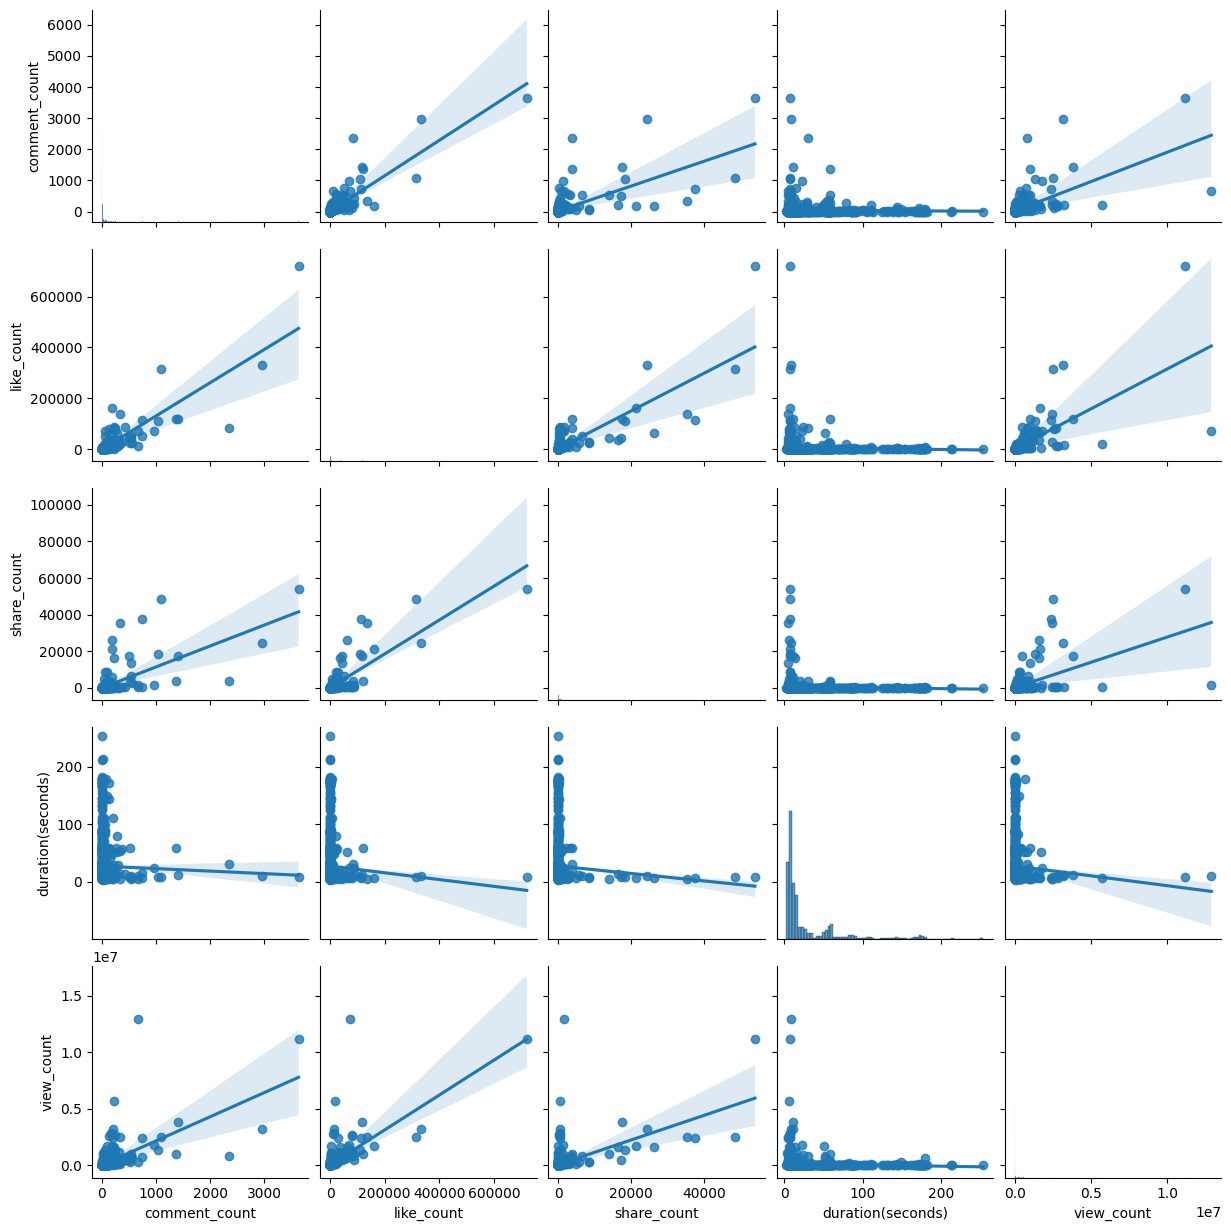

In [14]:
sns.pairplot(Numerical_features,kind = 'reg')

## Pair Grid

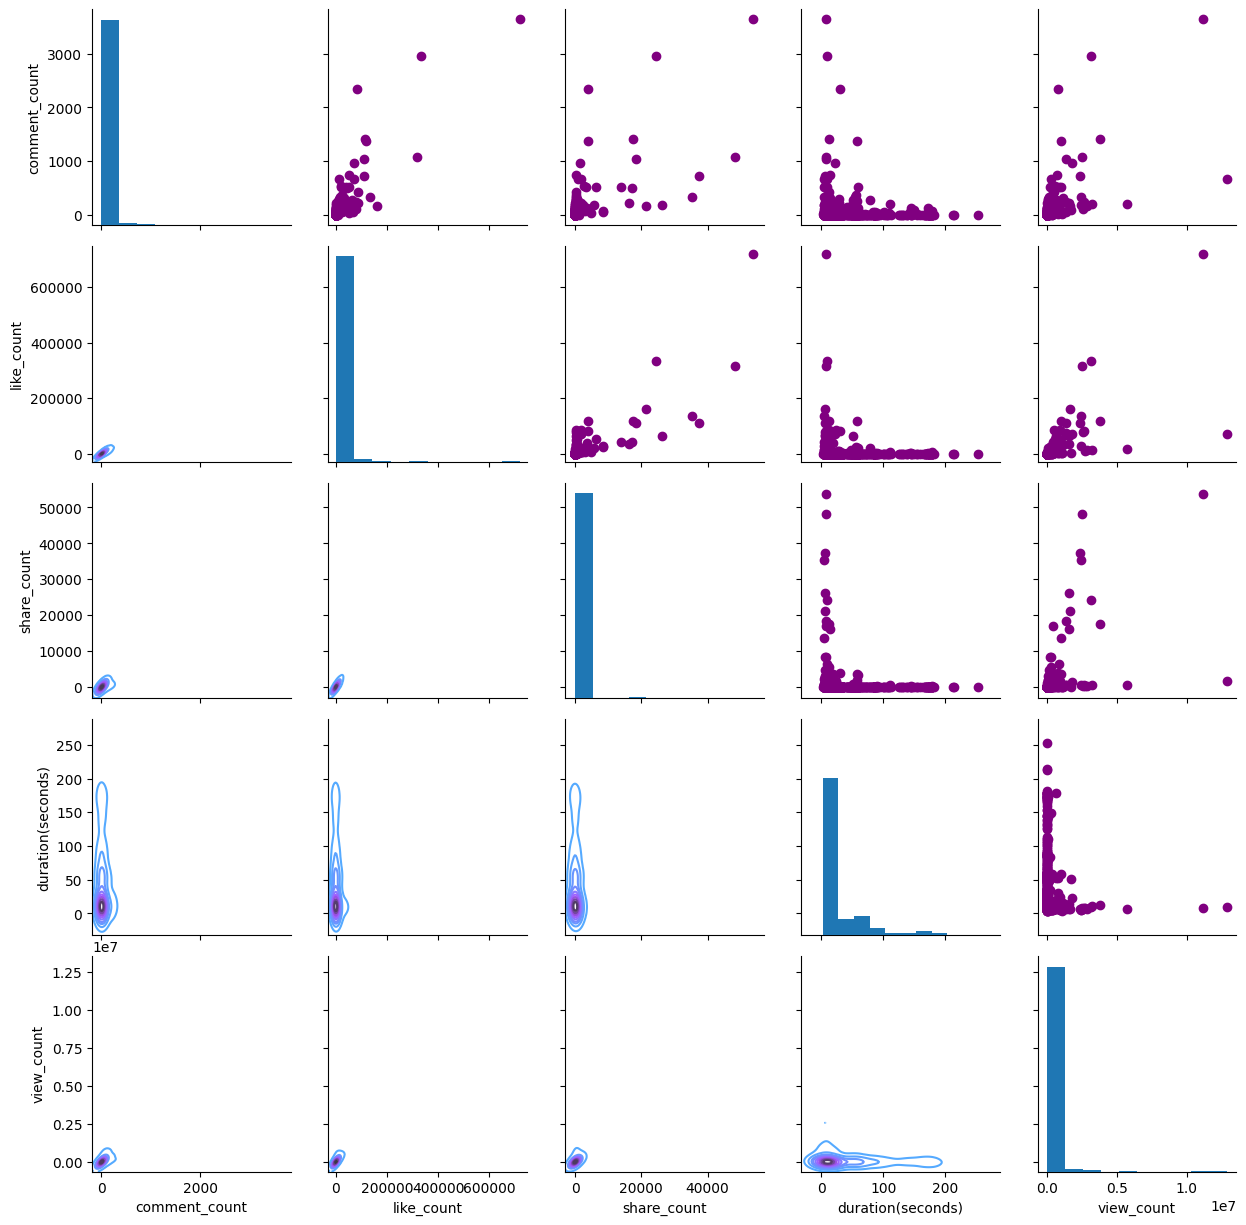

In [15]:
return_fig = sns.PairGrid(Numerical_features)

return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap = 'cool_d')
return_fig.map_diag(plt.hist,bins = 10)
# plt.savefig('pairgird.png')

## Data Distribution

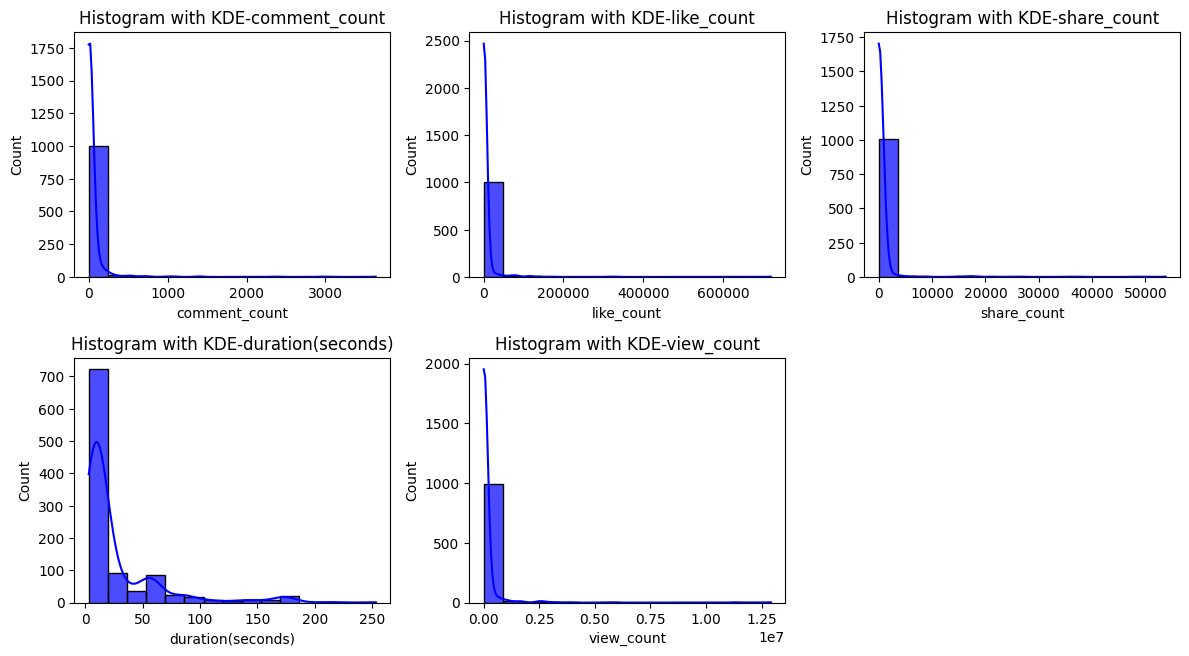

In [16]:
plt.figure(figsize=(12,16))
for i , column in enumerate(Numerical_features.columns):
    plt.subplot(5,3,i+1)
    sns.histplot(Numerical_features[column],kde=True,bins=15,color="Blue",alpha =0.7)
    plt.title(f"Histogram with KDE-{column}")
plt.tight_layout()
plt.show()



**Histograms with KDE:**

1. comment_count: This histogram shows the distribution of the number of comments on something (e.g., videos, posts, articles). It appears right-skewed, suggesting most items have relatively few comments, while a smaller number have a high number of comments.
2. like_count: This histogram displays the distribution of likes. It's also right-skewed, indicating most items have fewer likes, and a few are very popular.
3. share_count: This histogram shows the distribution of shares. It's relatively flat, suggesting shares are more evenly distributed across items.
4. duration(seconds): This histogram presents the distribution of video or audio duration. It's bimodal, with peaks around 50 seconds and 150 seconds. This suggests there might be two distinct types of content with different average lengths.
5. view_count: This histogram shows the distribution of views. It's heavily right-skewed, indicating most items have relatively few views, while a small number have very high view counts.
**Potential Data Issues:**

**Outliers**: The right-skewed distributions in comment_count, like_count, and view_count suggest potential outliers. It's worth checking for unusually high values that might distort the overall patterns.
Data Truncation: The view_count histogram has a sharp cutoff at 1e7 (10 million). This could indicate data truncation, where values above a certain threshold are not fully captured.

## QQ Plot


A quantile-quantile (QQ) plot, also known as a probability plot, is a graphical tool used to compare two probability distributions. It helps assess whether a dataset plausibly came from a specific theoretical distribution, such as a normal or exponential distribution. QQ plots are particularly useful in exploratory data analysis (EDA) and data visualization.

The purpose of a QQ plot is to compare the quantiles of two distributions. Quantiles divide a distribution into equal-sized proportions. For example, the quartiles of a distribution divide it into four equal-sized portions, and the deciles divide it into ten equal-sized portions.

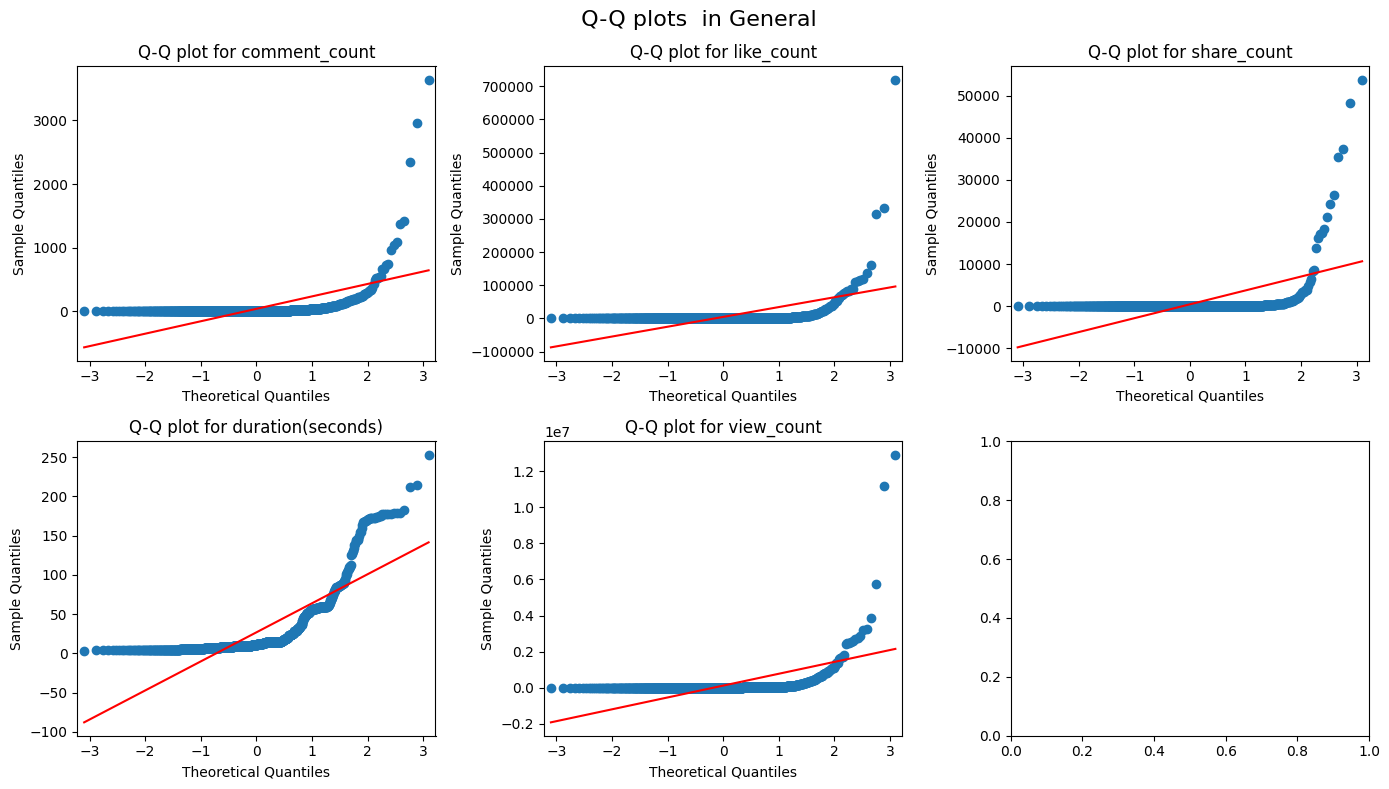

In [17]:

import statsmodels.api as sm
feature_names = Numerical_features.columns.tolist()

def make_univariate_plots(df, factors, title, plot_type):
    n = len(factors)
    ncols = 3
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
    fig.suptitle(title, fontsize=16)

    for i, factor in enumerate(factors):
        ax = axes[i // ncols, i % ncols]
        sm.qqplot(df[factor], line='s', ax=ax)
        ax.set_title(f'Q-Q plot for {factor}')

    plt.tight_layout()
    plt.show()

make_univariate_plots(

    df=Numerical_features,
    factors=feature_names,
    title=' Q-Q plots  in General',
    plot_type='qq-plot')




Most items have relatively few comments, likes, and views, while a small number have very high engagement. This is evident in the right-skewed distributions of comment_count, like_count, and view_count, suggesting that a few items are exceptionally popular.

Shares are more evenly distributed across items. The share_count histogram is relatively flat, indicating that users share content more consistently, not just the most popular items.

There might be two distinct types of content with different average lengths. The duration(seconds) histogram has two peaks, suggesting two categories of content with different typical durations (around 50 seconds and 150 seconds).

### low Variance Check

Variables with low variance can have several impacts on data analysis and modeling. Here are some of the key effects:

1. Reduced Predcitive Power
2. Increased Sensitivity to outliers

In [18]:
from sklearn.feature_selection import VarianceThreshold


categorical_features = df.select_dtypes(include=['object', 'category'])
selector = VarianceThreshold(threshold=0.01)
selector.fit(Numerical_features)
selected_features = selector.get_support()


low_variance_features = list(Numerical_features.columns[~selected_features])
print('Features with low Variance ',low_variance_features)

Features with low Variance  []


### Correlation Matrix

A correlation matrix is a tabular representation that shows the correlation coefficients between multiple variables in a dataset. Each cell in the matrix displays the correlation between two variables, ranging from -1 to 1. A positive correlation (closer to 1) indicates a direct relationship, while a negative correlation (closer to -1) suggests an inverse relationship. A correlation of 0 implies no linear relationship. Correlation matrices are widely used in statistics and data analysis to identify patterns, associations, and dependencies between variables, aiding in the understanding of how variables change in relation to each other.







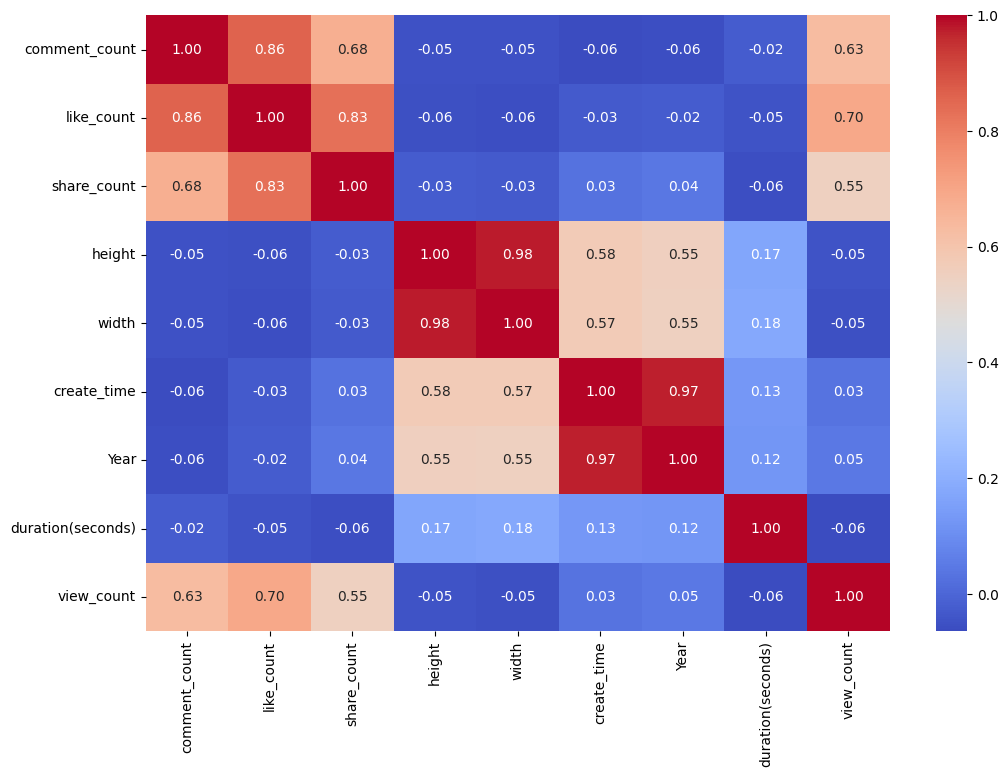

In [19]:
correlation_matrix = df.select_dtypes(include='number').corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Explaining Causation(Random Forest Regressor Apporach)


The Random Forest Regressor is a powerful machine learning algorithm that belongs to the ensemble learning family. It operates by constructing a multitude of decision trees during training and outputs the average prediction of the individual trees for regression tasks. Each tree in the forest is constructed using a random subset of the training data and a random subset of features, introducing diversity and reducing the risk of overfitting. The algorithm's strength lies in its ability to handle complex, non-linear relationships in data, making it particularly effective for tasks where traditional linear models may fall short. Random Forest Regressors are robust, versatile, and capable of capturing intricate patterns in the data, making them a popular choice 

In [20]:
x = df.drop(['view_count','title','create_time','Create_date'],axis=1)
y = df['view_count']


### Lable Encoding


Label encoding is essential for machine learning because it translates categorical data into numerical form, enabling models to understand and process it effectively. This unlocks valuable insights from categorical features, expands the applicability of many algorithms, and lays a foundation for accurate predictions.

In [21]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for column in x.columns:
    # Check if the column is of object or categorical type
    if x[column].dtype == 'object' or pd.api.types.is_categorical_dtype(x[column]):
        # Apply label encoding to the column in place
        x[column] = le.fit_transform(x[column])

x


,comment_count,like_count,share_count,height,width,Year,Days_of_week,Months,duration(seconds),Popularity,parts_of_day,Week_Status
0,12,291,14,1920,1080,2023,0,2,25,1,1,0
1,37,130,0,1920,1080,2023,0,2,36,1,3,0
2,3,147,3,1920,1080,2023,4,2,34,1,7,0
3,3,71,0,1920,1080,2023,4,2,70,1,1,0
4,4,113,1,1920,1080,2023,6,2,14,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,28,0,1280,720,2019,0,1,15,1,3,0
1021,1,26,0,1280,720,2019,0,1,15,1,3,0
1022,0,478,2,1280,720,2019,0,1,15,2,3,0
1023,0,43,0,1280,720,2019,0,1,15,1,0,0


### Feature Scalling

Feature scaling is a crucial data preprocessing step in machine learning that transforms the numerical features of a dataset to a common scale. This standardization ensures that all features have a consistent range of values, which can significantly improve the performance of many machine learning algorithms.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler  =MinMaxScaler()
df_scaled = scaler.fit_transform(x)
x = pd.DataFrame(df_scaled, columns=x.columns)

In [23]:
x

,comment_count,like_count,share_count,height,width,Year,Days_of_week,Months,duration(seconds),Popularity,parts_of_day,Week_Status
0,0.003299,0.000399,0.000260,1.0,1.0,1.0,0.000000,0.181818,0.088,0.25,0.142857,0.0
1,0.010173,0.000175,0.000000,1.0,1.0,1.0,0.000000,0.181818,0.132,0.25,0.428571,0.0
2,0.000825,0.000199,0.000056,1.0,1.0,1.0,0.666667,0.181818,0.124,0.25,1.000000,0.0
3,0.000825,0.000093,0.000000,1.0,1.0,1.0,0.666667,0.181818,0.268,0.25,0.142857,0.0
4,0.001100,0.000151,0.000019,1.0,1.0,1.0,1.000000,0.181818,0.044,0.25,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.000275,0.000033,0.000000,0.5,0.5,0.0,0.000000,0.090909,0.048,0.25,0.428571,0.0
1021,0.000275,0.000031,0.000000,0.5,0.5,0.0,0.000000,0.090909,0.048,0.25,0.428571,0.0
1022,0.000000,0.000659,0.000037,0.5,0.5,0.0,0.000000,0.090909,0.048,0.50,0.428571,0.0
1023,0.000000,0.000054,0.000000,0.5,0.5,0.0,0.000000,0.090909,0.048,0.25,0.000000,0.0


Random Forest Classifier is very userfull in capturing the complex
 ralationships in the data and also robust to autliers  

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y)

RandomForestRegressor()

### Feature Importance


feature importance provides insights into which features have a more significant impact on the model's predictions. Higher importance indicates that changes in that particular feature have a stronger association with changes in the predicted outcome.

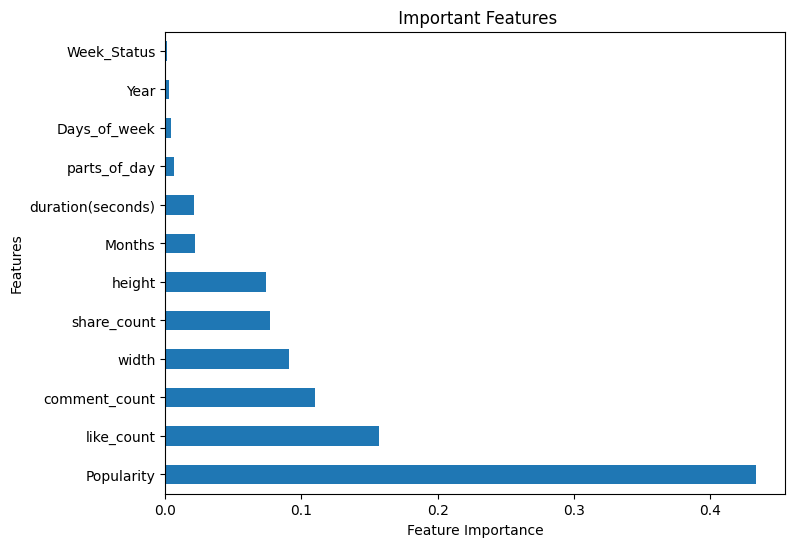

In [25]:

plt.figure(figsize=(8, 6))
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(12).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(' Important Features')
plt.show()

**Focus on Top Features**: Prioritize understanding and interpreting the most important features to gain a deeper understanding of the model's behavior and the key factors influencing its outcomes.





## Network Analysis

Network analysis is the study of relationships between entities, often represented as nodes and edges on a graph. It's a powerful tool for understanding complex systems in various fields, including social sciences, computer science, biology, and even finance.



* The central node labeled "view_count" seems to be the most connected, suggesting it might be a key variable of interest in the network

* The nodes labeled "create time," "duration(seconds)," and "Year" are all connected to "view_count," suggesting they might influence the number of views a video receives
* The other nodes, such as "width," "height," "like_count," "share_count," "comment_count," and "Popularity," also have connections to "view_count," implying they might play a role in its value as well.

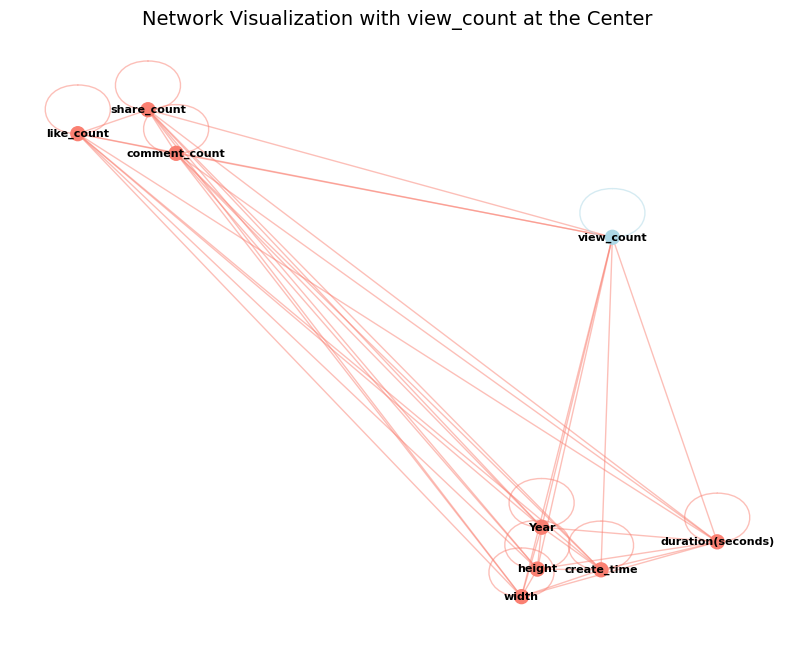

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd


plt.figure(figsize=(10, 8))

G = nx.from_pandas_adjacency(correlation_matrix)

desired_variable = "view_count"

pos = nx.spring_layout(G)


pos[desired_variable] = [0.5, 0.5]


node_colors = ['lightblue' if node == desired_variable else 'salmon' for node in G.nodes()]


nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, label=None)


node_colors_dict = {node: 'lightblue' if node == desired_variable else 'salmon' for node in G.nodes()}


edge_colors = [node_colors_dict[e[0]] for e in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)


nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')


plt.title(f"Network Visualization with {desired_variable} at the Center", fontsize=14)
plt.axis('off')

plt.show()

## Principal component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in statistics, machine learning, and exploratory data analysis. Its primary objective is to transform a high-dimensional dataset into a new coordinate system, where the majority of the variability in the data is captured by a smaller number of linearly uncorrelated variables called principal components. PCA achieves this by identifying and extracting these principal components, which are linear combinations of the original features.

In [27]:
Numerical_features

,comment_count,like_count,share_count,duration(seconds),view_count
0,12,291,14,25,5699
1,37,130,0,36,3006
2,3,147,3,34,2781
3,3,71,0,70,1079
4,4,113,1,14,2726
...,...,...,...,...,...
1020,1,28,0,15,2197
1021,1,26,0,15,1930
1022,0,478,2,15,11848
1023,0,43,0,15,3012


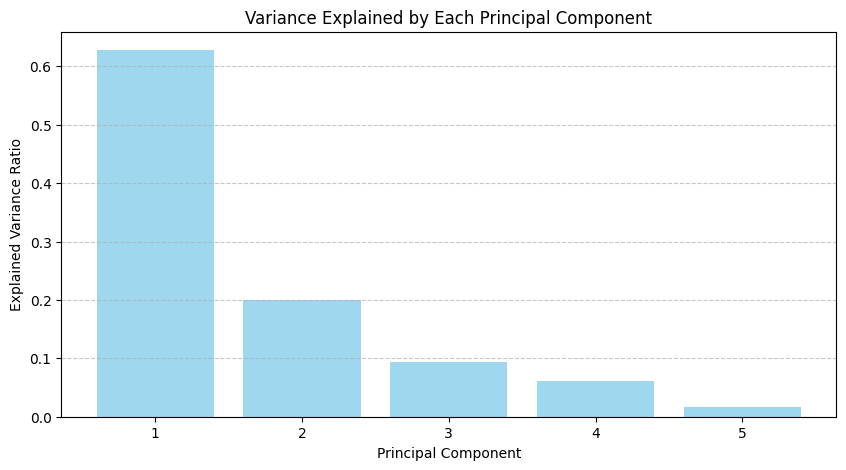

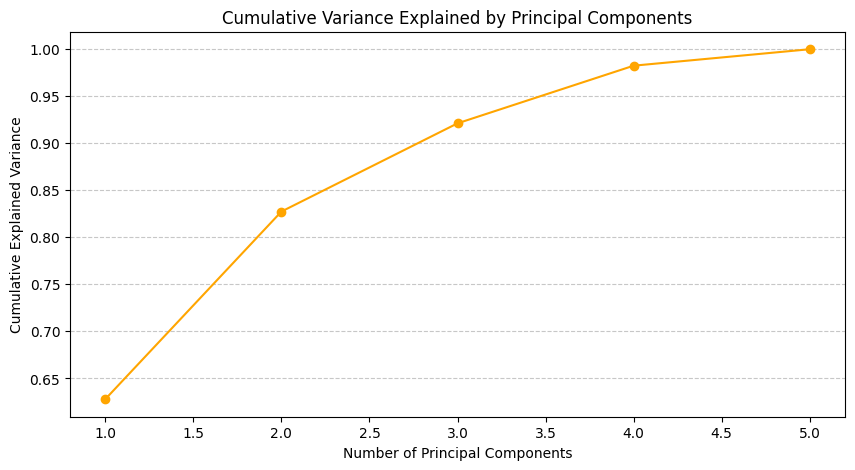

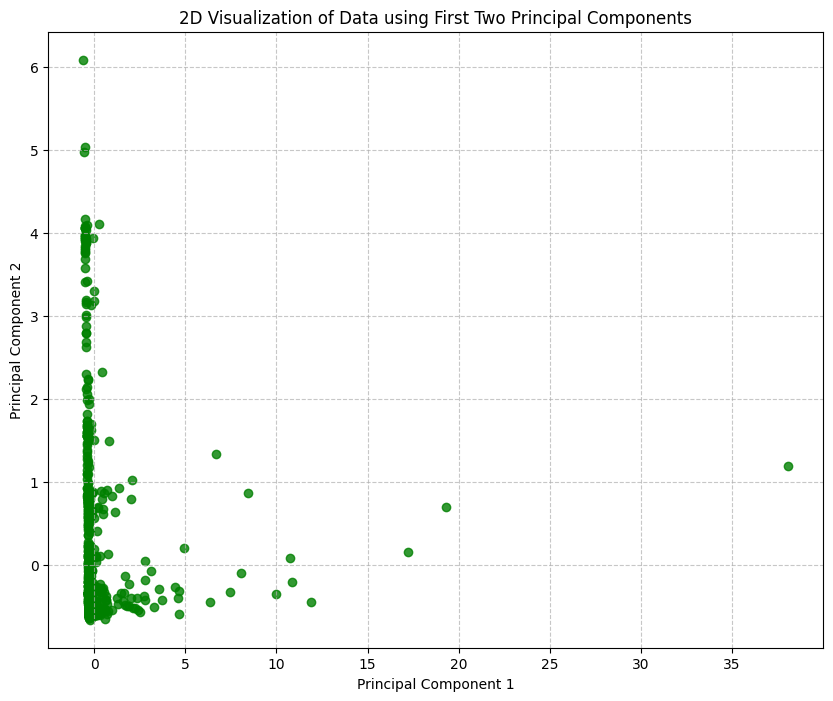

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
data_standardized = scaler.fit_transform(Numerical_features)


pca = PCA()


principal_components = pca.fit_transform(data_standardized)


explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='skyblue', alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.8, color='green')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Data using First Two Principal Components')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


In [41]:



feature_names = Numerical_features.columns

scaler = StandardScaler()
data_standardized = scaler.fit_transform(Numerical_features)

pca = PCA()
principal_components = pca.fit_transform(data_standardized)

loadings = pca.components_

loadings_df = pd.DataFrame(loadings, columns=feature_names)
loadings_df.index = ['Component {}'.format(i+1) for i in range(loadings.shape[0])]

print("Loadings of each feature on each principal component:")
loadings_df


Loadings of each feature on each principal component:


,comment_count,like_count,share_count,duration(seconds),view_count
Component 1,0.508143,0.543187,0.488766,-0.043670,0.453805
Component 2,0.057886,0.030106,0.005807,0.997791,-0.011090
Component 3,-0.065936,-0.157325,-0.527324,0.020889,0.832103
Component 4,0.739594,0.089581,-0.594142,-0.045485,-0.299838
Component 5,-0.432543,0.819308,-0.360553,0.001272,-0.107892


The table provides insights into the relationships between the original features and each principal component obtained through PCA. In Component 1, there is a positive association with engagement metrics (comment_count, like_count, share_count, view_count), suggesting a general engagement factor. Component 2 predominantly captures variance related to duration (seconds), while Component 3 is characterized by a strong positive association with view_count and weak negative associations with other engagement metrics. Component 4 exhibits a complex pattern, with strong positive contributions from comment_count and like_count, a strong negative contribution from share_count, and a weak negative contribution from duration (seconds). Finally, Component 5 reflects a mixed engagement pattern, positively influenced by like_count and view_count but negatively affected by comment_count and share_count.

## The End

### KEY FINDINGS

This project provides compelling evidence that social media algorithms prioritize content generating high engagement. Analysis reveals a positive correlation between 'comment_count', 'like_count', 'share_count', and 'view_count', highlighting the reciprocal relationship between user engagement and content visibility. These findings confirm that algorithms favor content sparking conversation and interaction, pushing it to a wider audience through increased viewership. Essentially, the more engagement a piece of content receives, the more people see it, further amplifying its reach and engagement – a self-perpetuating cycle benefiting engaging content creators.